### DSC550 Exercise 5.2
#### Madison Christiansen

In [112]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import axes

In [75]:
## importing the dataset
moviedf = pd.read_csv('/Users/madisonchristiansen/Desktop/labeledTrainData.csv')   
moviedf.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [15]:
## stemmed data by cleaning the text
def cleantext(sentence):
    
    sentence = sentence.lower() ## text to lower 
    sentence = re.sub(r'[^\w\s]+|_', '',sentence) ## remove all non-numeric characters
    sentence = re.sub(r'\s\s', ' ',sentence) ## remove extra space
    
    return sentence

moviedf['review'] = moviedf['review'].apply(cleantext)
moviedf.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,the classic war of the worlds by timothy hines...
2,7759_3,0,the film starts with a manager nicholas bell g...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Split the data into training and test set
X = moviedf['review']
y = moviedf['sentiment'] ##the target

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [19]:
## Sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)

(18750,)
(6250,)


In [21]:
## tf-idf feature matrix
tfidfs = TfidfVectorizer()
x_train_vector = tfidfs.fit_transform(X_train)

## apply tf-ifd to the test set
x_test_vector = tfidfs.transform(X_test)

#### You would only want to fit the tf-idf vectorization to the training set becuase the idf features will include information from the test set already. If you were to fit the test data you would be testing the quality of your model and the idf estimation, and test sets are usually small so this will be a poor estimation and worsen performance measures. 

In [114]:
## logistic regression model 
logreg = LogisticRegression(random_state=0)

In [115]:
## fit to the training set
logreg.fit(x_train_vector, y_train)

LogisticRegression(random_state=0)

In [116]:
import yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

In [117]:
## accuracy
mod_acc = 100*cm.score(x_test_vector, y_test)
print('Accuracy:', round(mod_acc,2), '%')

Accuracy: 93.97 %


/Users/madisonchristiansen/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/base.py:236: YellowbrickWarning: ConfusionMatrix does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warnings.warn(


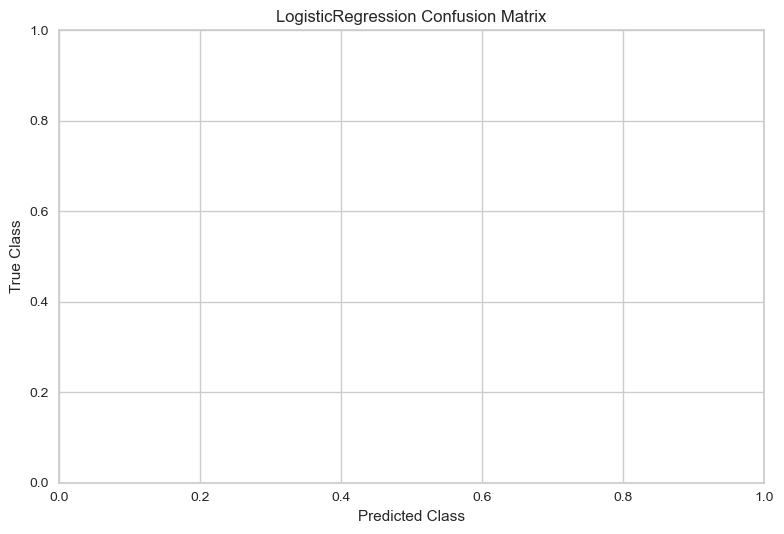

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [118]:
## confusion matrix model
cm = ConfusionMatrix(logreg)
cm.fit(x_test_vector, y_test)
cm.show()


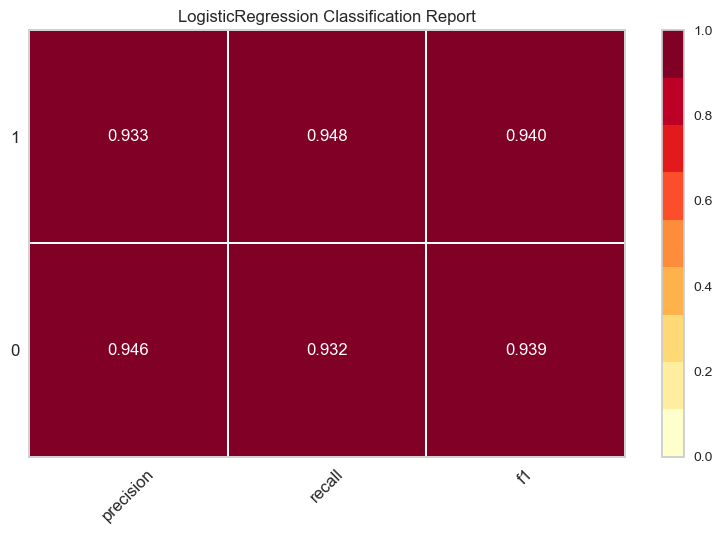

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [97]:
from yellowbrick.classifier import ClassificationReport

# precission, recall, f1 for logreg from classification report
report = ClassificationReport(logreg) 
report.fit(x_train_vector, y_test) # fit 
report.score(x_test_vector, y_test)  
report.show()

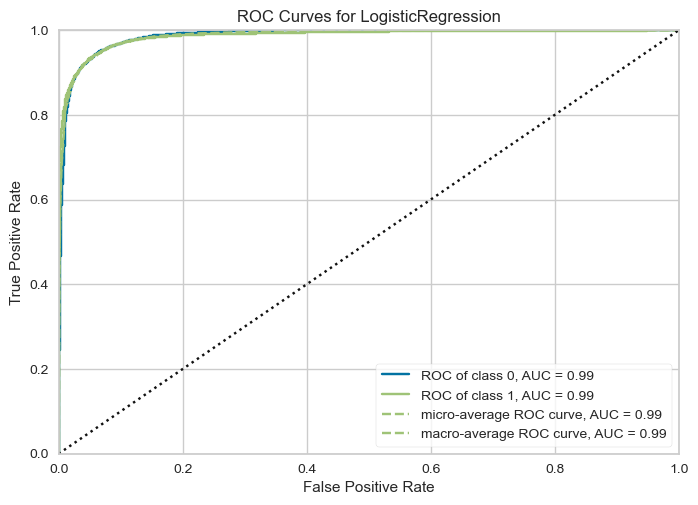

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [98]:
# ROC
roc = ROCAUC(logreg)
roc.fit(x_test_vector, y_test)
roc.score(x_test_vector, y_test)  
roc.show()

In [104]:
from sklearn.ensemble import RandomForestClassifier
## random forest regression model 
rfm = RandomForestClassifier(n_jobs=-1, random_state=0)
rfm.fit(x_train_vector, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

/Users/madisonchristiansen/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/base.py:236: YellowbrickWarning: ConfusionMatrix does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warnings.warn(


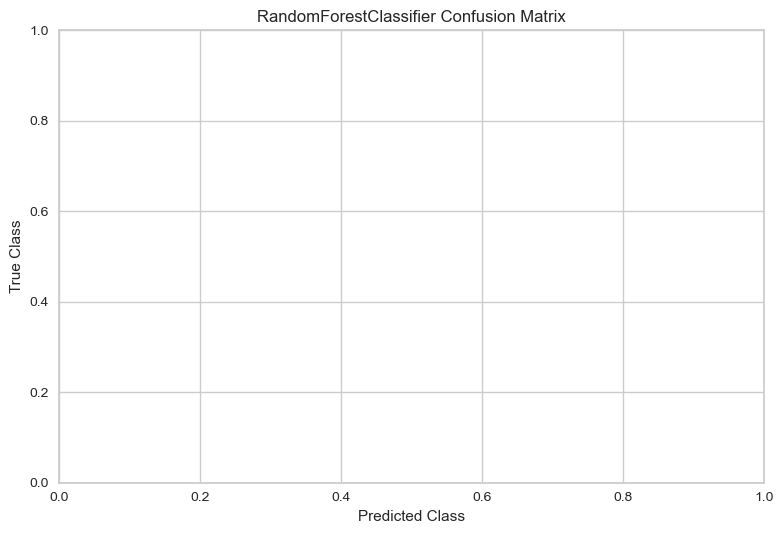

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [110]:
# rmf confusion matrix
cm = ConfusionMatrix(rfm) #update model for rfm
cm.fit(x_test_vector, y_test)
cm.show()

In [106]:
# accuracy rmf
mod_acc = 100*cm.score(x_test_vector, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%')

Model Accuracy:  83.82 %


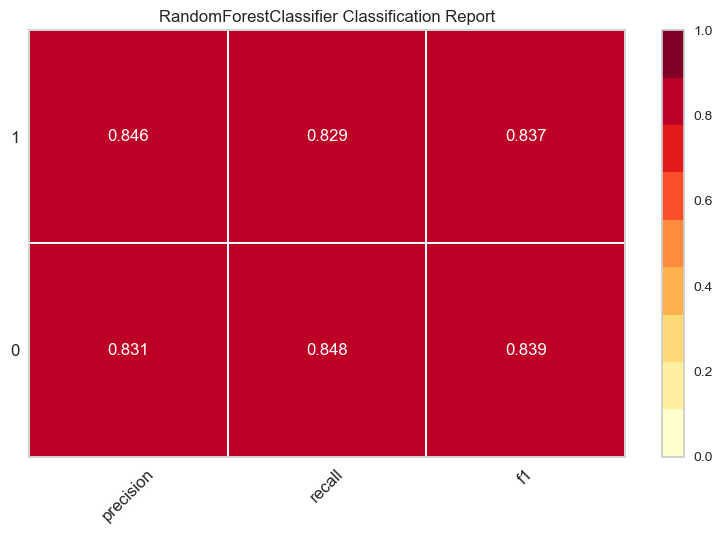

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [107]:
# precission, recall, f1 from classification report
report = ClassificationReport(rfm) #update model for rfm
report.fit(x_train_vector, y_test) # fit 
report.score(x_test_vector, y_test)  
report.show()

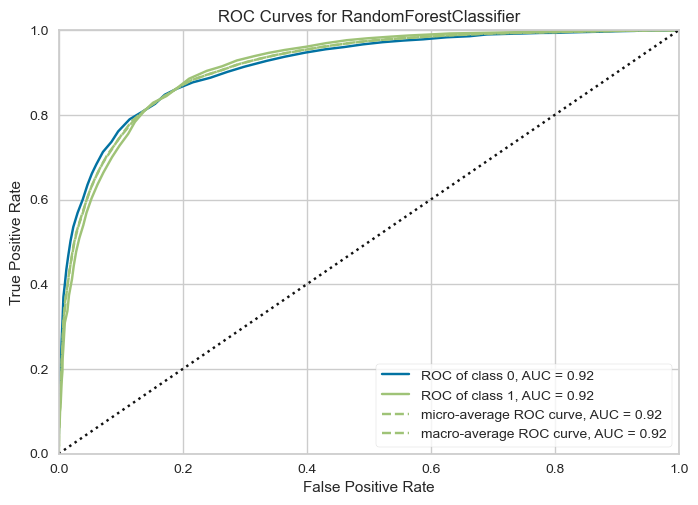

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [108]:
# ROC for rfm
roc = ROCAUC(rfm)
roc.fit(x_test_vector, y_test)
roc.score(x_test_vector, y_test)  
roc.show()